In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import sklearn

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

/Users/Kyelee/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Hello World of ML: Using Neural Networks to Recognize Digits

In this notebook we use the keras package to train a neural network to recognize handwritten digits in the MNIST data. Hello world! 
$$
$$
The first thing we'll do is load and visualize the train/test data for the digits. We'll use pandas matplotlib to generate 100 of the train dataset to see what we're working with.

In [2]:
# load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# introduce seed in order to make random numbers reproducible:
seed = 7 
np.random.seed(7)

In [4]:
print(train_data.shape)
print(test_data.shape)

train_data.iloc[0:5, 0:500] # note that the train data has one more column for the label 

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498
0,1,0,0,0,0,0,0,0,0,0,...,93,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,16,209,254,254,150
2,1,0,0,0,0,0,0,0,0,0,...,254,254,184,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,26,72,128,203,208,254,254,131,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,78,248,253,253


In [5]:
# turn pandas dataframes into numpy arrays for easier manipulation (also because numpy is great)

X_train = train_data.iloc[:, 1::].values
y_train = train_data.iloc[:, 0].values

print(X_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


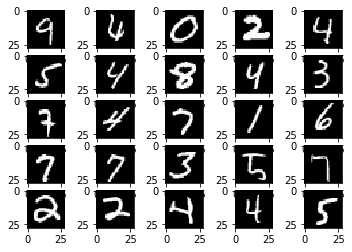

In [6]:
# Visualizing data: this code takes 25 random rows of the train dataset, reshapes it into 28 x 28 pixels, 
# and outputs the photo

fig = plt.figure()
for i in range(25):
    axes = fig.add_subplot(5, 5, i + 1, aspect='equal')
    img = X_train[np.random.randint(0, 42000), :].reshape(28, 28)
    axes.imshow(img, cmap = 'gray')
plt.show()

We should do some data cleaning routines to prepare the data for modelling. **Namely, we need to normalize the data by subtracting the mean from each x and dividing by the std.** It's also good to one-hot encode the categorical variables (in this case, the digits) so that we can keep the learner from deducing relationships among the categorical variables that aren't there. Sklearn has a LabelEncoder feature we can use to streamline the process.

In [7]:
# normalize the data 

In [8]:
# one-hot encode the classes in y. 

from sklearn import preprocessing
le = preprocessing.LabelBinarizer()
y_train = le.fit_transform(y_train)
print(y_train.shape) # it's now an array 
y_train 

(42000, 10)


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

Now we need to build our model! Following $\href{https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/}{here}$ we'll start simple and build a dense three-layer network. Dense means that every unit will be connected to every other unit in each layer. We'll use sigmoid functions as the activations because Pedro Domingos says sigmoid functions are the best :)  

In [9]:
# build model...

from keras.models import Sequential
from keras.layers import Dense

model_in = X_train.shape[1] # number of input neurons


model = keras.Sequential()
model.add(Dense(100, input_dim = model_in, activation = 'sigmoid'))
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid')) # we need 10 neurons for the output

In [10]:
# compile model...

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# fit model...

model.fit(X_train, y_train, epochs = 5, batch_size = 10)

Epoch 1/5
42000/42000 [==============================] - 14s 330us/step - loss: 0.1657 - acc: 0.9413
Epoch 2/5
42000/42000 [==============================] - 14s 340us/step - loss: 0.0805 - acc: 0.9745
Epoch 3/5
42000/42000 [==============================] - 11s 257us/step - loss: 0.0688 - acc: 0.9777
Epoch 4/5
42000/42000 [==============================] - 11s 270us/step - loss: 0.0632 - acc: 0.9790
Epoch 5/5
42000/42000 [==============================] - 11s 254us/step - loss: 0.0613 - acc: 0.9792


This is pretty good. With our simple dummy example and only 5 epochs (which means we have to wait a bit... not great) we got to an accuracy of about 0.98. Let's try using convolutional neural networks (convnets), which are optimized for visual inputs. The way convolution neural nets work is by  